In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-aug-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-aug-2022/train.csv
/kaggle/input/tabular-playground-series-aug-2022/test.csv


# Introduction

#### The Tabular Playground Series is always a good choice to put what we have learnt to practice.
#### The datasets are very well prepared, not too big, and easy to manipulate. 
#### This time, I personally have put more thought and time into Feature Engineering, especially Data Imputation. 
#### I have read about extensive data imputation methods and how they can sway the outcome of machine learning models, sometimes even more than the choice of the model themselves. 
#### I hope by reading this notebook, you can experience the different ways I go about imputing missing values and how I analyzed the datasets. 
#### If you found this notebook helpful in the end, please do leave an upvote and do feel free to check out my other notebooks on [various machine learning models](https://www.kaggle.com/code/kimmik123/all-about-linear-regression).

# Data Exploration

### Loading in datasets

In [2]:
train_df = pd.read_csv('../input/tabular-playground-series-aug-2022/train.csv')
test_df = pd.read_csv('../input/tabular-playground-series-aug-2022/test.csv')
sample_df = pd.read_csv('../input/tabular-playground-series-aug-2022/sample_submission.csv')

In [3]:
train_df.sample(10)

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
8281,8281,B,136.42,material_5,material_5,8,8,4,11,5,...,12.739,17.894,17.940,10.780,16.812,16.448,14.506,16.264,NaN,0
20332,20332,D,112.19,material_7,material_5,6,6,3,20,18,...,11.756,16.416,16.848,9.042,14.657,NaN,15.624,16.397,795.414,0
3523,3523,A,135.32,material_7,material_8,9,5,7,3,7,...,12.190,14.768,21.061,12.852,16.204,17.798,15.147,18.089,872.873,0
11464,11464,C,96.19,material_7,material_8,5,8,6,7,6,...,12.091,17.005,19.986,10.028,15.046,14.708,13.733,16.157,849.773,0
23783,23783,E,145.80,material_7,material_6,6,9,5,9,8,...,10.845,14.896,17.984,12.392,13.250,17.097,14.324,15.332,282.181,0
21635,21635,E,156.02,material_7,material_6,6,9,14,8,6,...,9.846,17.261,21.049,11.750,15.698,15.383,13.305,17.666,869.871,0
8689,8689,B,109.43,material_5,material_5,8,8,8,9,7,...,12.465,15.442,16.513,8.746,15.847,16.097,NaN,17.054,NaN,0
18687,18687,D,124.56,material_7,material_5,6,6,7,11,9,...,10.167,17.021,19.817,11.409,14.056,17.057,16.653,18.443,651.635,0
14026,14026,C,129.24,material_7,material_8,5,8,5,5,2,...,11.927,17.376,17.231,12.924,15.094,17.358,14.612,16.966,819.546,0
14503,14503,C,87.48,material_7,material_8,5,8,8,13,3,...,11.316,14.447,18.790,11.112,15.499,15.432,14.797,15.214,655.821,0


In [4]:
train_df.shape

(26570, 26)

### Checking for column names

In [5]:
train_df.columns.to_list()

['id',
 'product_code',
 'loading',
 'attribute_0',
 'attribute_1',
 'attribute_2',
 'attribute_3',
 'measurement_0',
 'measurement_1',
 'measurement_2',
 'measurement_3',
 'measurement_4',
 'measurement_5',
 'measurement_6',
 'measurement_7',
 'measurement_8',
 'measurement_9',
 'measurement_10',
 'measurement_11',
 'measurement_12',
 'measurement_13',
 'measurement_14',
 'measurement_15',
 'measurement_16',
 'measurement_17',
 'failure']

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26570 entries, 0 to 26569
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              26570 non-null  int64  
 1   product_code    26570 non-null  object 
 2   loading         26320 non-null  float64
 3   attribute_0     26570 non-null  object 
 4   attribute_1     26570 non-null  object 
 5   attribute_2     26570 non-null  int64  
 6   attribute_3     26570 non-null  int64  
 7   measurement_0   26570 non-null  int64  
 8   measurement_1   26570 non-null  int64  
 9   measurement_2   26570 non-null  int64  
 10  measurement_3   26189 non-null  float64
 11  measurement_4   26032 non-null  float64
 12  measurement_5   25894 non-null  float64
 13  measurement_6   25774 non-null  float64
 14  measurement_7   25633 non-null  float64
 15  measurement_8   25522 non-null  float64
 16  measurement_9   25343 non-null  float64
 17  measurement_10  25270 non-null 

### Checking for different types of columns; numerical or categorical

In [7]:
categorical_cols = train_df.select_dtypes(include=['object'])
print("Categorical columns include: {}".format(categorical_cols.columns.to_list()))
print("\n")
numerical_cols = train_df.select_dtypes(exclude=['object'])
print("Numerical columns include: {}".format(numerical_cols.columns.to_list()))

Categorical columns include: ['product_code', 'attribute_0', 'attribute_1']


Numerical columns include: ['id', 'loading', 'attribute_2', 'attribute_3', 'measurement_0', 'measurement_1', 'measurement_2', 'measurement_3', 'measurement_4', 'measurement_5', 'measurement_6', 'measurement_7', 'measurement_8', 'measurement_9', 'measurement_10', 'measurement_11', 'measurement_12', 'measurement_13', 'measurement_14', 'measurement_15', 'measurement_16', 'measurement_17', 'failure']


### Checking for any null values

In [8]:
train_df.isna().sum().sort_values()

id                   0
measurement_2        0
measurement_1        0
measurement_0        0
attribute_3          0
failure              0
attribute_1          0
attribute_0          0
product_code         0
attribute_2          0
loading            250
measurement_3      381
measurement_4      538
measurement_5      676
measurement_6      796
measurement_7      937
measurement_8     1048
measurement_9     1227
measurement_10    1300
measurement_11    1468
measurement_12    1601
measurement_13    1774
measurement_14    1874
measurement_15    2009
measurement_16    2110
measurement_17    2284
dtype: int64

#### There seems to be quite a few null values in the measurement section. 
#### We would have to take note that there are no null values for the categorical features.
#### Now there are two ways to go about this hiccup. 
#### 1. Ignore the null values and build a model which can tolerate missing null values such as decision trees.
#### 2. Come up with a imputation technique for these missing values.

#### In this notebook, I would proceed on with the second option.

### Looking at the numerical features distributions.

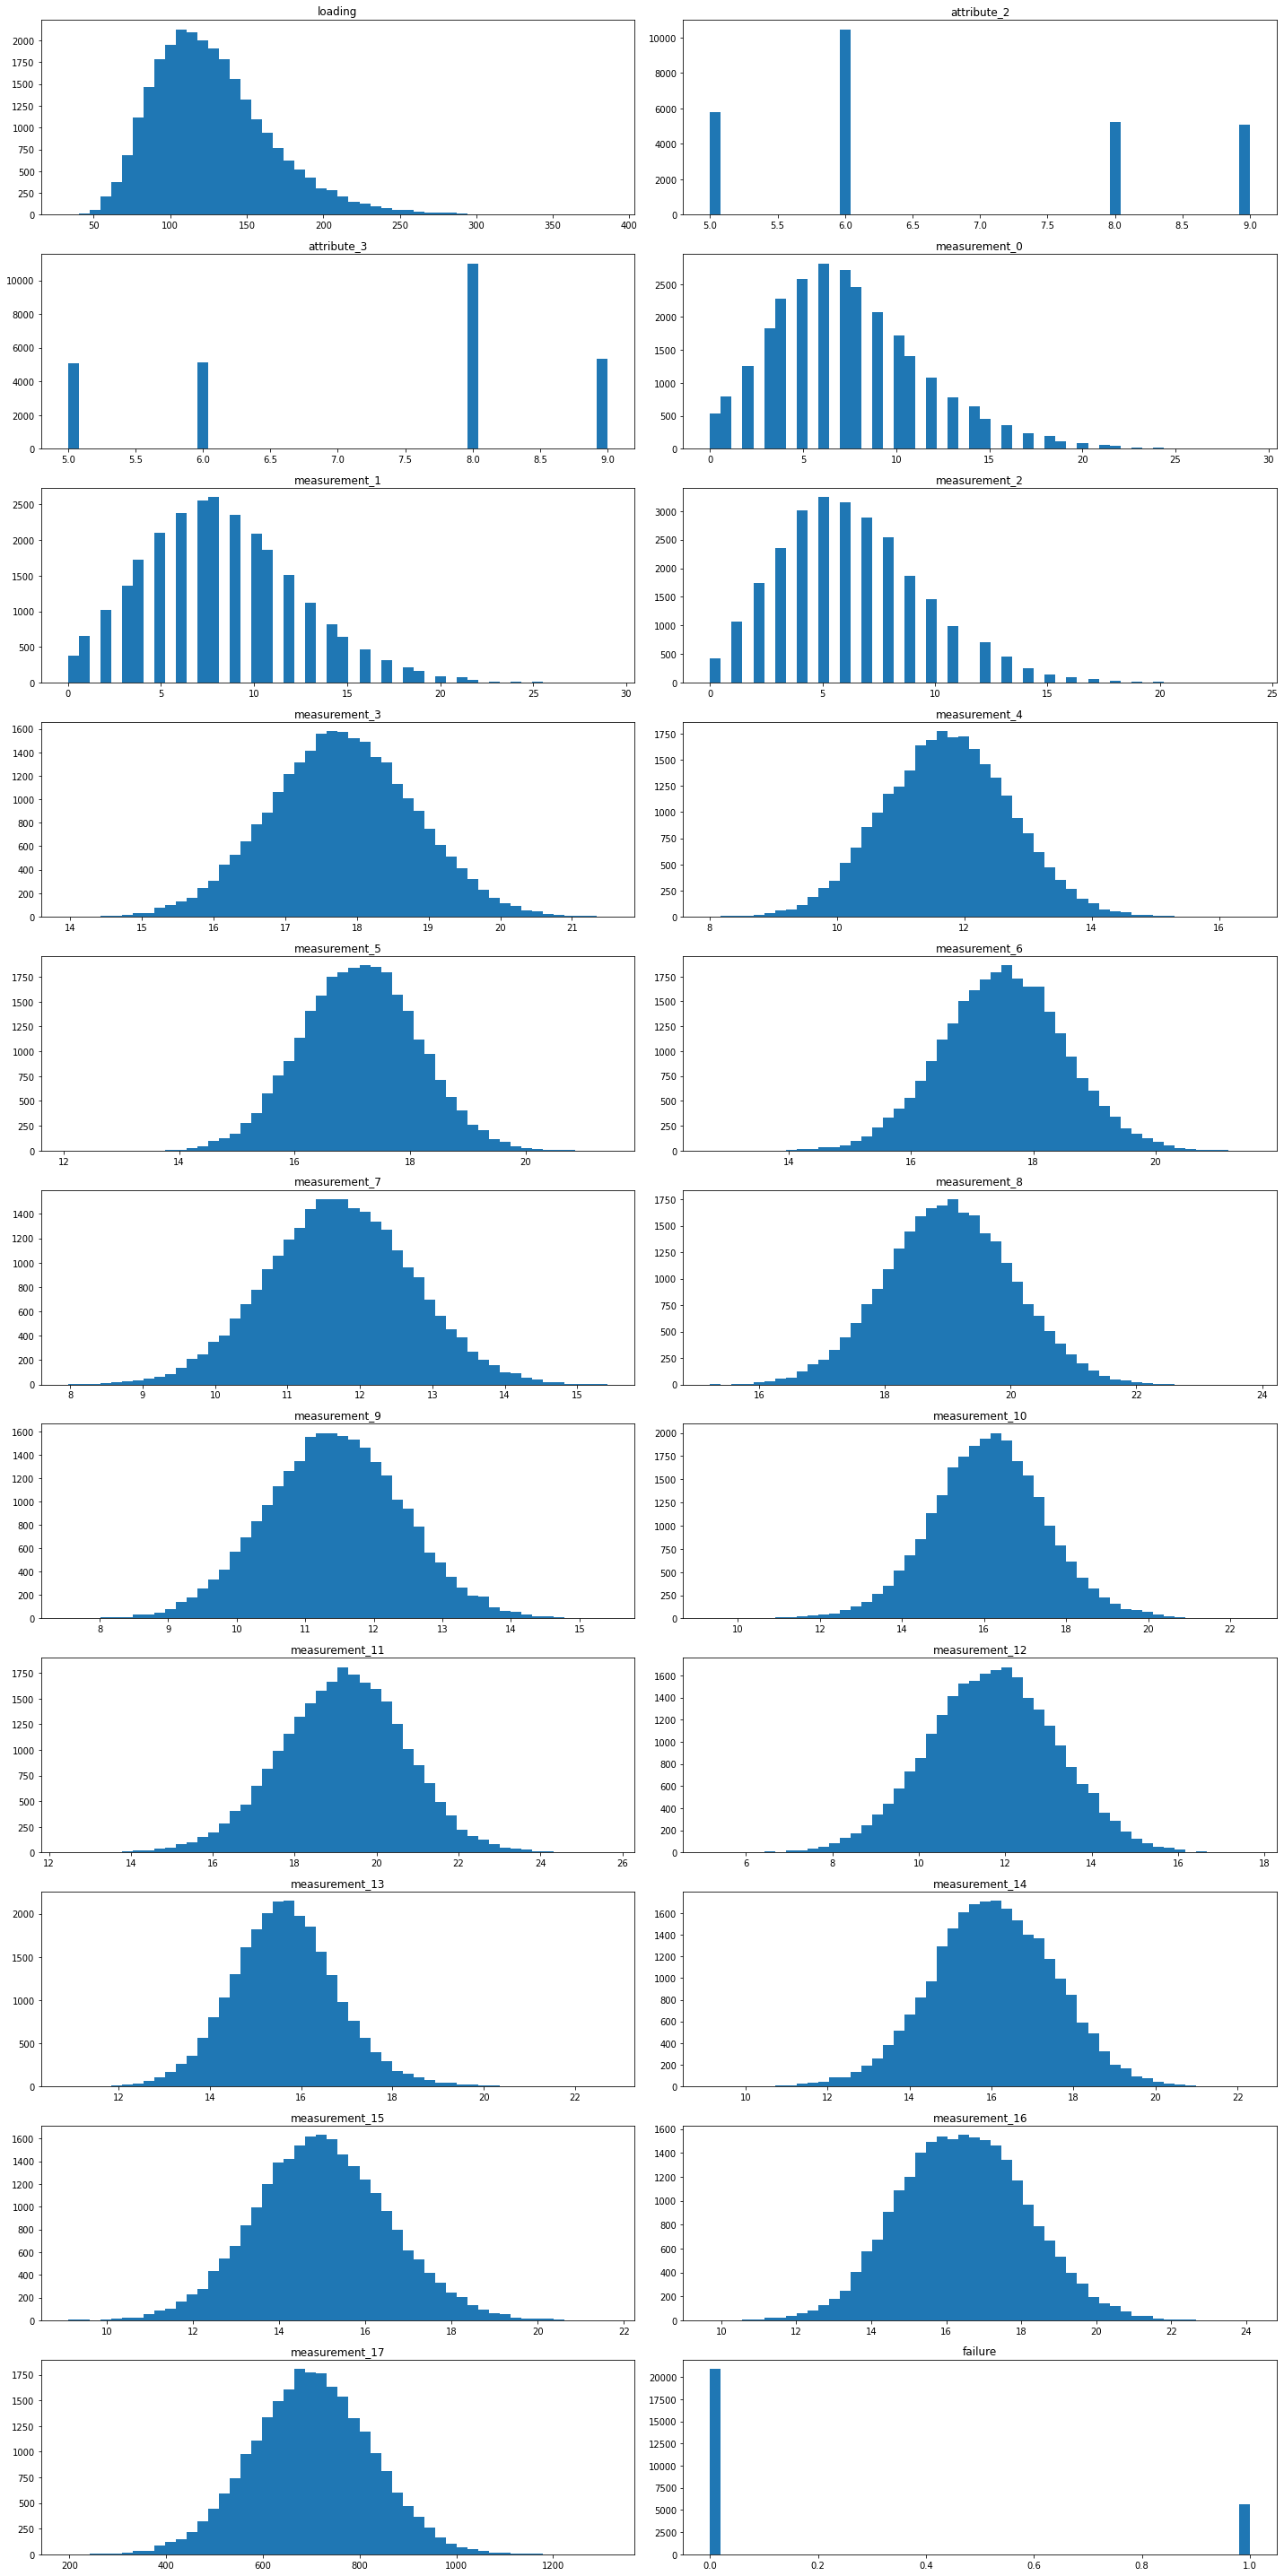

In [9]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(11,2, figsize=(20, 40))
for i in range(11):
    for j in range(2):
        axs[i, j].hist(train_df[train_df.select_dtypes(exclude=['object']).columns.to_list()[i*2+j+1]],bins=50)
        axs[i, j].set_title(train_df.select_dtypes(exclude=['object']).columns.to_list()[i*2+j+1])
fig.tight_layout()

#### From the above visualization, it seems pretty obvious that most of the numerical features are distributed with a normal/gaussian distribution.
#### However some features like attributes 2 and 3 seem to be more of a categorical feature.
#### However, they are still numerical features and look more like the width, length of objects and not a categorical feature per se.
#### **If we were using a model where the feature's numerical value would affect it in terms of model coefficients, it would have been a trouble but since I'm leaning towards using boosting, I don't believe we would need to categorically encode them or do anything to them.**
#### However when I want to use some other models such as logistic regression where coefficients play a huge role in the model, I would want to standardize the feature values.

#### **One more thing to take note of here is that later for our data imputation section when we use the KNN algorithm, the algorithm is senstive to outliers.** 
#### However, as we can see, for the features that have the most amount of null values, there doesn't seem to be too high a number of outliers, which is a good thing!

### Looking at the categorical features distributions.

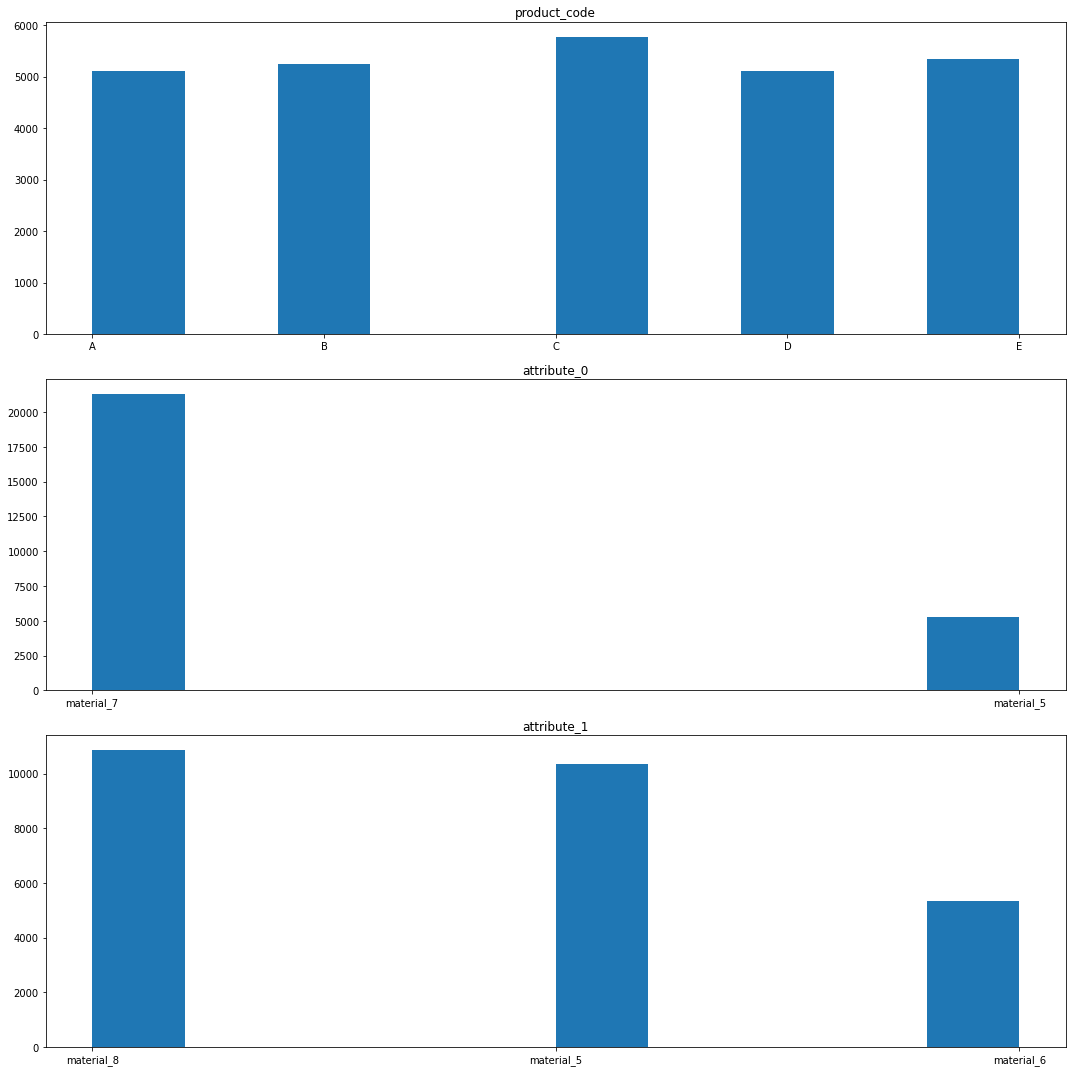

In [10]:
fig, axs = plt.subplots(3, figsize=(15, 15))
for i in range(3):
    axs[i].hist(train_df[train_df.select_dtypes(include=['object']).columns.to_list()[i]])
    axs[i].set_title(train_df.select_dtypes(include=['object']).columns.to_list()[i])
fig.tight_layout()

#### The good thing is that the product codes are evenly distributed.
#### The rest of the categorical features seems to not be evenly distributed, especially attribute_0 seems to be heavily leaning towards material_7.

# Data Engineering and Preparation

#### For data engineering, one thing that we would have to keep in mind is that I am going to be using multiple algorithms.
#### Additionally, I will produce a dataset that has **null values imputed**, **standardized** and **categorical values one hot encoded**.

### Preparing the dataset - we would be using KNN algorithm and MICE algorithm for data imputation to account for the null values.

In [11]:
second_train_df = pd.read_csv('../input/tabular-playground-series-aug-2022/train.csv')
second_test_df = pd.read_csv('../input/tabular-playground-series-aug-2022/test.csv')

#### But before that let us first perform one hot encoding for our categorical columns.

In [12]:
from sklearn.preprocessing import OneHotEncoder

categorical_df_train = second_train_df[categorical_cols.columns.to_list()]
categorical_df_test = second_test_df[categorical_cols.columns.to_list()]

encoder_train = OneHotEncoder(handle_unknown='ignore')
encoder_test = OneHotEncoder(handle_unknown='ignore')
encoder_df_train = pd.DataFrame(encoder_train.fit_transform(categorical_df_train).toarray())
encoder_df_test = pd.DataFrame(encoder_test.fit_transform(categorical_df_test).toarray())

encoder_df_train.columns = list(encoder_train.get_feature_names()) # X_0: product code, X_1: attribute_0, X_2: attribute_1 
encoder_df_test.columns = list(encoder_test.get_feature_names()) # X_0: product code, X_1: attribute_0, X_2: attribute_1 

display(encoder_df_train)
display(encoder_df_test)

,x0_A,x0_B,x0_C,x0_D,x0_E,x1_material_5,x1_material_7,x2_material_5,x2_material_6,x2_material_8
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
26565,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
26566,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
26567,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
26568,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


,x0_F,x0_G,x0_H,x0_I,x1_material_5,x1_material_7,x2_material_5,x2_material_6,x2_material_7
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
20770,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
20771,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
20772,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
20773,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


#### As we can discover from this, I believe dropping the product code and attribute_1 is the way to go.
#### The product code is different between the train and test datasets which makes the column useless.
#### Furthermore, the attribute_1 columns also consists of an unknown material_7 that exists in the test dataset but not in the training dataset. 
#### Therefore, I would be dropping the product_code and attribute_1 columns.

In [13]:
second_train_df.drop(['id','product_code','attribute_1'], axis=1, inplace=True)
second_test_df.drop(['id','product_code','attribute_1'], axis=1, inplace=True)

In [14]:
categorical_df_train = second_train_df[['attribute_0']]
categorical_df_test = second_test_df[['attribute_0']]

encoder_train = OneHotEncoder(handle_unknown='ignore')
encoder_test = OneHotEncoder(handle_unknown='ignore')
encoder_df_train = pd.DataFrame(encoder_train.fit_transform(categorical_df_train).toarray())
encoder_df_test = pd.DataFrame(encoder_test.fit_transform(categorical_df_test).toarray())

encoder_df_train.columns = list(encoder_train.get_feature_names()) # X_0: product code, X_1: attribute_0, X_2: attribute_1 
encoder_df_test.columns = list(encoder_test.get_feature_names()) # X_0: product code, X_1: attribute_0, X_2: attribute_1 

display(encoder_df_train)
display(encoder_df_test)

,x0_material_5,x0_material_7
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
26565,0.0,1.0
26566,0.0,1.0
26567,0.0,1.0
26568,0.0,1.0


,x0_material_5,x0_material_7
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
20770,0.0,1.0
20771,0.0,1.0
20772,0.0,1.0
20773,0.0,1.0


#### Now let us change our original dataset

In [15]:
second_train_df.drop('attribute_0', axis=1, inplace=True)
second_train_df = second_train_df.join(encoder_df_train)
display(second_train_df)

second_test_df.drop('attribute_0', axis=1, inplace=True)
second_test_df = second_test_df.join(encoder_df_test)
display(second_test_df)

,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,...,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure,x0_material_5,x0_material_7
0,80.10,9,5,7,8,4,18.040,12.518,15.748,19.292,...,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0,0.0,1.0
1,84.89,9,5,14,3,3,18.213,11.540,17.717,17.893,...,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0,0.0,1.0
2,82.43,9,5,12,1,5,18.057,11.652,16.738,18.240,...,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0,0.0,1.0
3,101.07,9,5,13,2,6,17.295,11.188,18.576,18.339,...,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0,0.0,1.0
4,188.06,9,5,9,2,8,19.346,12.950,16.990,15.746,...,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26565,158.95,6,9,6,16,4,16.301,13.259,18.068,15.505,...,17.942,10.112,15.795,18.572,16.144,NaN,729.131,0,0.0,1.0
26566,146.02,6,9,10,12,8,17.543,NaN,17.984,19.078,...,20.564,10.234,14.450,14.322,13.146,16.471,853.924,0,0.0,1.0
26567,115.62,6,9,1,10,1,15.670,11.535,16.778,18.385,...,17.476,8.668,15.069,16.599,15.590,14.065,750.364,0,0.0,1.0
26568,106.38,6,9,2,9,4,18.059,NaN,16.918,18.101,...,17.814,14.928,16.273,15.485,13.624,12.865,730.156,0,0.0,1.0


,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,...,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,x0_material_5,x0_material_7
0,119.57,6,4,6,9,6,19.305,10.178,17.534,18.168,...,15.909,18.070,13.772,13.659,16.825,13.742,17.710,634.612,1.0,0.0
1,113.51,6,4,11,8,0,17.883,11.927,17.228,16.033,...,13.998,NaN,12.473,17.468,16.708,14.776,14.102,537.037,1.0,0.0
2,112.16,6,4,8,12,4,18.475,10.481,16.619,18.189,...,17.046,18.086,10.907,13.363,15.737,17.065,16.021,658.995,1.0,0.0
3,112.72,6,4,8,11,10,16.518,10.888,15.293,18.592,...,18.165,16.163,10.933,15.501,15.667,12.620,16.111,594.301,1.0,0.0
4,208.00,6,4,14,16,8,17.808,12.693,17.678,15.814,...,14.578,17.849,11.941,16.070,16.183,13.324,17.150,801.044,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20770,144.74,9,5,0,4,9,18.465,12.570,18.146,17.089,...,NaN,19.771,11.562,17.246,15.131,15.209,NaN,696.466,0.0,1.0
20771,74.53,9,5,4,8,7,18.900,9.896,18.288,NaN,...,16.027,15.694,13.564,15.494,15.296,13.812,16.501,613.249,0.0,1.0
20772,67.73,9,5,10,11,2,18.656,NaN,18.242,17.910,...,16.137,20.612,11.134,16.519,15.525,14.175,17.728,783.349,0.0,1.0
20773,126.15,9,5,8,16,11,16.536,11.226,18.144,17.250,...,15.422,19.496,9.319,15.817,17.403,16.437,15.179,745.210,0.0,1.0


In [16]:
second_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26570 entries, 0 to 26569
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   loading         26320 non-null  float64
 1   attribute_2     26570 non-null  int64  
 2   attribute_3     26570 non-null  int64  
 3   measurement_0   26570 non-null  int64  
 4   measurement_1   26570 non-null  int64  
 5   measurement_2   26570 non-null  int64  
 6   measurement_3   26189 non-null  float64
 7   measurement_4   26032 non-null  float64
 8   measurement_5   25894 non-null  float64
 9   measurement_6   25774 non-null  float64
 10  measurement_7   25633 non-null  float64
 11  measurement_8   25522 non-null  float64
 12  measurement_9   25343 non-null  float64
 13  measurement_10  25270 non-null  float64
 14  measurement_11  25102 non-null  float64
 15  measurement_12  24969 non-null  float64
 16  measurement_13  24796 non-null  float64
 17  measurement_14  24696 non-null 

In [17]:
second_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20775 entries, 0 to 20774
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   loading         20552 non-null  float64
 1   attribute_2     20775 non-null  int64  
 2   attribute_3     20775 non-null  int64  
 3   measurement_0   20775 non-null  int64  
 4   measurement_1   20775 non-null  int64  
 5   measurement_2   20775 non-null  int64  
 6   measurement_3   20446 non-null  float64
 7   measurement_4   20366 non-null  float64
 8   measurement_5   20267 non-null  float64
 9   measurement_6   20151 non-null  float64
 10  measurement_7   20055 non-null  float64
 11  measurement_8   19929 non-null  float64
 12  measurement_9   19871 non-null  float64
 13  measurement_10  19708 non-null  float64
 14  measurement_11  19639 non-null  float64
 15  measurement_12  19535 non-null  float64
 16  measurement_13  19472 non-null  float64
 17  measurement_14  19335 non-null 

#### There we go! No categorical columns now :)
#### Now let us concern ourselves with imputing the null values.
#### First, we are going to attempt to use the KNNImputer package.

In [18]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=30)

imputed_second_train_df = pd.DataFrame(imputer.fit_transform(second_train_df))
imputed_second_train_df.columns = second_train_df.columns.to_list()
display(imputed_second_train_df)

imputed_second_test_df = pd.DataFrame(imputer.fit_transform(second_test_df))
imputed_second_test_df.columns = second_test_df.columns.to_list()
display(imputed_second_test_df)

,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,...,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure,x0_material_5,x0_material_7
0,80.10,9.0,5.0,7.0,8.0,4.0,18.040,12.518000,15.748,19.292,...,17.594000,15.193,15.029,15.902867,13.034,14.684000,764.100,0.0,0.0,1.0
1,84.89,9.0,5.0,14.0,3.0,3.0,18.213,11.540000,17.717,17.893,...,17.915000,11.755,14.732,15.425000,14.395,15.631000,682.057,0.0,0.0,1.0
2,82.43,9.0,5.0,12.0,1.0,5.0,18.057,11.652000,16.738,18.240,...,19.430533,13.798,16.711,18.631000,14.094,17.946000,663.376,0.0,0.0,1.0
3,101.07,9.0,5.0,13.0,2.0,6.0,17.295,11.188000,18.576,18.339,...,18.377000,10.020,15.250,15.562000,16.154,17.172000,826.282,0.0,0.0,1.0
4,188.06,9.0,5.0,9.0,2.0,8.0,19.346,12.950000,16.990,15.746,...,19.932000,12.428,16.182,12.760000,13.153,16.412000,579.885,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26565,158.95,6.0,9.0,6.0,16.0,4.0,16.301,13.259000,18.068,15.505,...,17.942000,10.112,15.795,18.572000,16.144,16.296367,729.131,0.0,0.0,1.0
26566,146.02,6.0,9.0,10.0,12.0,8.0,17.543,11.793533,17.984,19.078,...,20.564000,10.234,14.450,14.322000,13.146,16.471000,853.924,0.0,0.0,1.0
26567,115.62,6.0,9.0,1.0,10.0,1.0,15.670,11.535000,16.778,18.385,...,17.476000,8.668,15.069,16.599000,15.590,14.065000,750.364,0.0,0.0,1.0
26568,106.38,6.0,9.0,2.0,9.0,4.0,18.059,11.642267,16.918,18.101,...,17.814000,14.928,16.273,15.485000,13.624,12.865000,730.156,0.0,0.0,1.0


,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,...,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,x0_material_5,x0_material_7
0,119.57,6.0,4.0,6.0,9.0,6.0,19.305,10.178,17.534,18.1680,...,15.909000,18.070000,13.772,13.659,16.825,13.742,17.710000,634.612,1.0,0.0
1,113.51,6.0,4.0,11.0,8.0,0.0,17.883,11.927,17.228,16.0330,...,13.998000,18.864533,12.473,17.468,16.708,14.776,14.102000,537.037,1.0,0.0
2,112.16,6.0,4.0,8.0,12.0,4.0,18.475,10.481,16.619,18.1890,...,17.046000,18.086000,10.907,13.363,15.737,17.065,16.021000,658.995,1.0,0.0
3,112.72,6.0,4.0,8.0,11.0,10.0,16.518,10.888,15.293,18.5920,...,18.165000,16.163000,10.933,15.501,15.667,12.620,16.111000,594.301,1.0,0.0
4,208.00,6.0,4.0,14.0,16.0,8.0,17.808,12.693,17.678,15.8140,...,14.578000,17.849000,11.941,16.070,16.183,13.324,17.150000,801.044,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20770,144.74,9.0,5.0,0.0,4.0,9.0,18.465,12.570,18.146,17.0890,...,16.444233,19.771000,11.562,17.246,15.131,15.209,16.990433,696.466,0.0,1.0
20771,74.53,9.0,5.0,4.0,8.0,7.0,18.900,9.896,18.288,17.5243,...,16.027000,15.694000,13.564,15.494,15.296,13.812,16.501000,613.249,0.0,1.0
20772,67.73,9.0,5.0,10.0,11.0,2.0,18.656,11.904,18.242,17.9100,...,16.137000,20.612000,11.134,16.519,15.525,14.175,17.728000,783.349,0.0,1.0
20773,126.15,9.0,5.0,8.0,16.0,11.0,16.536,11.226,18.144,17.2500,...,15.422000,19.496000,9.319,15.817,17.403,16.437,15.179000,745.210,0.0,1.0


In [19]:
imputed_second_train_df.isna().sum()

loading           0
attribute_2       0
attribute_3       0
measurement_0     0
measurement_1     0
measurement_2     0
measurement_3     0
measurement_4     0
measurement_5     0
measurement_6     0
measurement_7     0
measurement_8     0
measurement_9     0
measurement_10    0
measurement_11    0
measurement_12    0
measurement_13    0
measurement_14    0
measurement_15    0
measurement_16    0
measurement_17    0
failure           0
x0_material_5     0
x0_material_7     0
dtype: int64

In [20]:
imputed_second_test_df.isna().sum()

loading           0
attribute_2       0
attribute_3       0
measurement_0     0
measurement_1     0
measurement_2     0
measurement_3     0
measurement_4     0
measurement_5     0
measurement_6     0
measurement_7     0
measurement_8     0
measurement_9     0
measurement_10    0
measurement_11    0
measurement_12    0
measurement_13    0
measurement_14    0
measurement_15    0
measurement_16    0
measurement_17    0
x0_material_5     0
x0_material_7     0
dtype: int64

#### Alright! We have imputed with the KNN algorithm.

#### Let us try to impute the missing values with another, more complicated, algorithm called [Multivariate Imputation by Chained Equation](https://cran.r-project.org/web/packages/miceRanger/vignettes/miceAlgorithm.html).

In [21]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor

mice_imputer = IterativeImputer(estimator = None, max_iter= 50, n_nearest_features=None, imputation_order='ascending', verbose=3) # Defining 

mice_second_train_df = pd.DataFrame(mice_imputer.fit_transform(second_train_df))
mice_second_train_df.columns = second_train_df.columns.to_list()
display(mice_second_train_df)

mice_second_test_df = pd.DataFrame(mice_imputer.fit_transform(second_test_df))
mice_second_test_df.columns = second_test_df.columns.to_list()
display(mice_second_test_df)

[IterativeImputer] Completing matrix with shape (26570, 24)
[IterativeImputer] Ending imputation round 1/50, elapsed time 1.49
[IterativeImputer] Change: 452.55164415720674, scaled tolerance: 1.312794 
[IterativeImputer] Ending imputation round 2/50, elapsed time 3.32
[IterativeImputer] Change: 47.82418893946389, scaled tolerance: 1.312794 
[IterativeImputer] Ending imputation round 3/50, elapsed time 5.24
[IterativeImputer] Change: 21.085823213820696, scaled tolerance: 1.312794 
[IterativeImputer] Ending imputation round 4/50, elapsed time 6.72
[IterativeImputer] Change: 11.025929385893864, scaled tolerance: 1.312794 
[IterativeImputer] Ending imputation round 5/50, elapsed time 8.30
[IterativeImputer] Change: 6.208975232604985, scaled tolerance: 1.312794 
[IterativeImputer] Ending imputation round 6/50, elapsed time 10.14
[IterativeImputer] Change: 3.5615670572144253, scaled tolerance: 1.312794 
[IterativeImputer] Ending imputation round 7/50, elapsed time 11.95
[IterativeImputer] Ch

,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,...,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure,x0_material_5,x0_material_7
0,80.10,9.0,5.0,7.0,8.0,4.0,18.040,12.518000,15.748,19.292,...,17.594000,15.193,15.029,16.26797,13.034,14.684000,764.100,0.0,0.0,1.0
1,84.89,9.0,5.0,14.0,3.0,3.0,18.213,11.540000,17.717,17.893,...,17.915000,11.755,14.732,15.42500,14.395,15.631000,682.057,0.0,0.0,1.0
2,82.43,9.0,5.0,12.0,1.0,5.0,18.057,11.652000,16.738,18.240,...,19.357275,13.798,16.711,18.63100,14.094,17.946000,663.376,0.0,0.0,1.0
3,101.07,9.0,5.0,13.0,2.0,6.0,17.295,11.188000,18.576,18.339,...,18.377000,10.020,15.250,15.56200,16.154,17.172000,826.282,0.0,0.0,1.0
4,188.06,9.0,5.0,9.0,2.0,8.0,19.346,12.950000,16.990,15.746,...,19.932000,12.428,16.182,12.76000,13.153,16.412000,579.885,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26565,158.95,6.0,9.0,6.0,16.0,4.0,16.301,13.259000,18.068,15.505,...,17.942000,10.112,15.795,18.57200,16.144,15.596397,729.131,0.0,0.0,1.0
26566,146.02,6.0,9.0,10.0,12.0,8.0,17.543,11.980146,17.984,19.078,...,20.564000,10.234,14.450,14.32200,13.146,16.471000,853.924,0.0,0.0,1.0
26567,115.62,6.0,9.0,1.0,10.0,1.0,15.670,11.535000,16.778,18.385,...,17.476000,8.668,15.069,16.59900,15.590,14.065000,750.364,0.0,0.0,1.0
26568,106.38,6.0,9.0,2.0,9.0,4.0,18.059,11.742030,16.918,18.101,...,17.814000,14.928,16.273,15.48500,13.624,12.865000,730.156,0.0,0.0,1.0


[IterativeImputer] Completing matrix with shape (20775, 23)
[IterativeImputer] Ending imputation round 1/50, elapsed time 1.07
[IterativeImputer] Change: 347.1845421825619, scaled tolerance: 1.2427860000000002 
[IterativeImputer] Ending imputation round 2/50, elapsed time 2.56
[IterativeImputer] Change: 51.2938247967129, scaled tolerance: 1.2427860000000002 
[IterativeImputer] Ending imputation round 3/50, elapsed time 4.32
[IterativeImputer] Change: 20.168549319785427, scaled tolerance: 1.2427860000000002 
[IterativeImputer] Ending imputation round 4/50, elapsed time 6.17
[IterativeImputer] Change: 8.31441223957546, scaled tolerance: 1.2427860000000002 
[IterativeImputer] Ending imputation round 5/50, elapsed time 7.89
[IterativeImputer] Change: 3.433311219609564, scaled tolerance: 1.2427860000000002 
[IterativeImputer] Ending imputation round 6/50, elapsed time 9.51
[IterativeImputer] Change: 1.4165983317192818, scaled tolerance: 1.2427860000000002 
[IterativeImputer] Ending imputati

,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,...,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,x0_material_5,x0_material_7
0,119.57,6.0,4.0,6.0,9.0,6.0,19.305,10.17800,17.534,18.168000,...,15.909000,18.070000,13.772,13.659,16.825,13.742,17.710000,634.612,1.0,0.0
1,113.51,6.0,4.0,11.0,8.0,0.0,17.883,11.92700,17.228,16.033000,...,13.998000,18.054357,12.473,17.468,16.708,14.776,14.102000,537.037,1.0,0.0
2,112.16,6.0,4.0,8.0,12.0,4.0,18.475,10.48100,16.619,18.189000,...,17.046000,18.086000,10.907,13.363,15.737,17.065,16.021000,658.995,1.0,0.0
3,112.72,6.0,4.0,8.0,11.0,10.0,16.518,10.88800,15.293,18.592000,...,18.165000,16.163000,10.933,15.501,15.667,12.620,16.111000,594.301,1.0,0.0
4,208.00,6.0,4.0,14.0,16.0,8.0,17.808,12.69300,17.678,15.814000,...,14.578000,17.849000,11.941,16.070,16.183,13.324,17.150000,801.044,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20770,144.74,9.0,5.0,0.0,4.0,9.0,18.465,12.57000,18.146,17.089000,...,16.084795,19.771000,11.562,17.246,15.131,15.209,16.859576,696.466,0.0,1.0
20771,74.53,9.0,5.0,4.0,8.0,7.0,18.900,9.89600,18.288,17.693791,...,16.027000,15.694000,13.564,15.494,15.296,13.812,16.501000,613.249,0.0,1.0
20772,67.73,9.0,5.0,10.0,11.0,2.0,18.656,11.78048,18.242,17.910000,...,16.137000,20.612000,11.134,16.519,15.525,14.175,17.728000,783.349,0.0,1.0
20773,126.15,9.0,5.0,8.0,16.0,11.0,16.536,11.22600,18.144,17.250000,...,15.422000,19.496000,9.319,15.817,17.403,16.437,15.179000,745.210,0.0,1.0


In [22]:
mice_second_train_df.isna().sum()

loading           0
attribute_2       0
attribute_3       0
measurement_0     0
measurement_1     0
measurement_2     0
measurement_3     0
measurement_4     0
measurement_5     0
measurement_6     0
measurement_7     0
measurement_8     0
measurement_9     0
measurement_10    0
measurement_11    0
measurement_12    0
measurement_13    0
measurement_14    0
measurement_15    0
measurement_16    0
measurement_17    0
failure           0
x0_material_5     0
x0_material_7     0
dtype: int64

In [23]:
mice_second_test_df.isna().sum()

loading           0
attribute_2       0
attribute_3       0
measurement_0     0
measurement_1     0
measurement_2     0
measurement_3     0
measurement_4     0
measurement_5     0
measurement_6     0
measurement_7     0
measurement_8     0
measurement_9     0
measurement_10    0
measurement_11    0
measurement_12    0
measurement_13    0
measurement_14    0
measurement_15    0
measurement_16    0
measurement_17    0
x0_material_5     0
x0_material_7     0
dtype: int64

#### Now the final thing for us to do is to standardize or normalize the columns of these two datasets.
#### For this case, I'm going to proceed to standardize the columns, mainly due to the fact that the columns display a gaussian distribution, except for attribute_2 and attribute_3.
#### **In the future, I wouldn't mind attempting to drop these columns and proceeding on.**

In [24]:
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()

scaled_imputed_second_train_df = pd.DataFrame(scale.fit_transform(imputed_second_train_df.drop('failure',axis=1)))
scaled_imputed_second_train_df.columns = imputed_second_train_df.drop('failure',axis=1).columns.to_list()
scaled_imputed_second_train_df = scaled_imputed_second_train_df.join(train_df['failure'])
display(scaled_imputed_second_train_df)

scaled_imputed_second_test_df = pd.DataFrame(scale.fit_transform(imputed_second_test_df))
scaled_imputed_second_test_df.columns = imputed_second_test_df.columns.to_list()
display(scaled_imputed_second_test_df)

scaled_mice_second_train_df = pd.DataFrame(scale.fit_transform(mice_second_train_df.drop('failure',axis=1)))
scaled_mice_second_train_df.columns = mice_second_train_df.drop('failure',axis=1).columns.to_list()
scaled_mice_second_train_df = scaled_mice_second_train_df.join(train_df['failure'])
display(scaled_mice_second_train_df)

scaled_mice_second_test_df = pd.DataFrame(scale.fit_transform(mice_second_test_df))
scaled_mice_second_test_df.columns = mice_second_test_df.columns.to_list()
display(scaled_mice_second_test_df)

,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,...,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,x0_material_5,x0_material_7,failure
0,-1.228167,1.525966,-1.538285,-0.101025,-0.055370,-0.681939,0.250556,0.796692,-1.402811,1.814684,...,-1.067339,2.417704,-0.555161,-0.097104,-1.316981,-1.079820,0.530989,-0.496233,0.496233,0
1,-1.104877,1.525966,-1.538285,1.599402,-1.246039,-0.984141,0.424557,-0.194926,0.598158,0.389178,...,-0.850414,0.038678,-0.820928,-0.428814,-0.404741,-0.503029,-0.163153,-0.496233,0.496233,0
2,-1.168195,1.525966,-1.538285,1.113565,-1.722306,-0.379737,0.267654,-0.081366,-0.396737,0.742752,...,0.173750,1.452392,0.949952,1.796624,-0.606493,0.906973,-0.321207,-0.496233,0.496233,0
3,-0.688423,1.525966,-1.538285,1.356484,-1.484172,-0.077535,-0.498758,-0.551827,1.471105,0.843628,...,-0.538205,-1.161907,-0.357403,-0.333716,0.774266,0.435551,1.057092,-0.496233,0.496233,0
4,1.550602,1.525966,-1.538285,0.384811,-1.484172,0.526868,1.564117,1.234707,-0.140646,-1.798501,...,0.512631,0.504380,0.476584,-2.278718,-1.237218,-0.027343,-1.027600,-0.496233,0.496233,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26565,0.801343,-0.512321,1.208090,-0.343944,1.849699,-0.681939,-1.498513,1.548010,0.954857,-2.044068,...,-0.832168,-1.098245,0.130283,1.755669,0.767563,-0.097773,0.235126,-0.496233,0.496233,0
26566,0.468540,-0.512321,1.208090,0.627729,0.897164,0.526868,-0.249322,0.062138,0.869493,1.596630,...,0.939722,-1.013823,-1.073271,-1.194459,-1.241910,0.008592,1.290963,-0.496233,0.496233,0
26567,-0.313922,-0.512321,1.208090,-1.558534,0.420897,-1.588544,-2.133166,-0.199995,-0.356088,0.890500,...,-1.147081,-2.097463,-0.519368,0.386116,0.396233,-1.456836,0.414773,-0.496233,0.496233,0
26568,-0.551749,-0.512321,1.208090,-1.315616,0.182763,-0.681939,0.269666,-0.091235,-0.213815,0.601119,...,-0.918668,2.234329,0.558014,-0.387165,-0.921521,-2.187723,0.243799,-0.496233,0.496233,0


,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,...,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,x0_material_5,x0_material_7
0,-0.207216,-1.325146,-1.145711,-0.340067,0.008674,-0.033091,1.519782,-1.554400,0.397311,0.660329,...,-0.140479,-0.505528,1.402958,-1.578766,0.511709,-0.925241,0.682681,-0.536463,0.986469,-0.986469
1,-0.362800,-1.325146,-1.145711,0.829695,-0.222055,-1.597307,0.089906,0.199502,0.090288,-1.506194,...,-1.392672,0.007949,0.421617,1.316432,0.425848,-0.231443,-1.602611,-1.317568,0.986469,-0.986469
2,-0.397459,-1.325146,-1.145711,0.127838,0.700860,-0.554497,0.685185,-1.250551,-0.520749,0.681639,...,0.604547,-0.495188,-0.761431,-1.803753,-0.286721,1.304440,-0.387124,-0.341273,0.986469,-0.986469
3,-0.383082,-1.325146,-1.145711,0.127838,0.470131,1.009719,-1.282654,-0.842410,-1.851183,1.090589,...,1.337778,-1.737950,-0.741789,-0.178673,-0.338090,-1.678085,-0.330119,-0.859160,0.986469,-0.986469
4,2.063128,-1.325146,-1.145711,1.531552,1.623774,0.488314,0.014491,0.967649,0.541793,-1.728428,...,-1.012624,-0.648352,0.019713,0.253821,0.040576,-1.205712,0.327979,0.795855,0.986469,-0.986469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20770,0.438997,0.967548,-0.624180,-1.743781,-1.144969,0.749016,0.675130,0.844304,1.011358,-0.434603,...,0.210236,0.593764,-0.266606,1.147691,-0.731434,0.059093,0.226910,-0.041311,-1.013716,1.013716
20771,-1.363569,0.967548,-0.624180,-0.807972,-0.222055,0.227611,1.112539,-1.837190,1.153833,0.007124,...,-0.063158,-2.041047,1.245822,-0.183993,-0.610349,-0.878272,-0.083095,-0.707478,-1.013716,1.013716
20772,-1.538151,0.967548,-0.624180,0.595742,0.470131,-1.075902,0.867188,0.176437,1.107679,0.398519,...,0.008920,1.137271,-0.589942,0.595103,-0.442297,-0.634705,0.694082,0.654204,-1.013716,1.013716
20773,-0.038281,0.967548,-0.624180,0.127838,1.623774,1.270422,-1.264554,-0.503463,1.009351,-0.271226,...,-0.459588,0.416042,-1.961099,0.061517,0.935874,0.883062,-0.920444,0.348894,-1.013716,1.013716


,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,...,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,x0_material_5,x0_material_7,failure
0,-1.228452,1.525966,-1.538285,-0.101025,-0.055370,-0.681939,0.249979,0.796279,-1.396392,1.809124,...,-1.065662,2.412928,-0.558158,0.152116,-1.313915,-1.080754,0.515875,-0.496233,0.496233,0
1,-1.105150,1.525966,-1.538285,1.599402,-1.246039,-0.984141,0.424003,-0.194467,0.594892,0.388974,...,-0.848856,0.036870,-0.823894,-0.433498,-0.402498,-0.504945,-0.158027,-0.496233,0.496233,0
2,-1.168474,1.525966,-1.538285,1.113565,-1.722306,-0.379737,0.267079,-0.081007,-0.395188,0.741220,...,0.125271,1.448821,0.946782,1.793721,-0.604068,0.902654,-0.311473,-0.496233,0.496233,0
3,-0.688652,1.525966,-1.538285,1.356484,-1.484172,-0.077535,-0.499432,-0.551054,1.463613,0.841717,...,-0.536817,-1.162216,-0.360422,-0.338324,0.775447,0.432036,1.026639,-0.496233,0.496233,0
4,1.550604,1.525966,-1.538285,0.384811,-1.484172,0.526868,1.563711,1.233910,-0.140336,-1.790485,...,0.513445,0.501992,0.473469,-2.284883,-1.234224,-0.030070,-0.997269,-0.496233,0.496233,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26565,0.801268,-0.512321,1.208090,-0.343944,1.849699,-0.681939,-1.499317,1.546937,0.949864,-2.035128,...,-0.830620,-1.098634,0.127207,1.752734,0.768750,-0.525985,0.228639,-0.496233,0.496233,0
26566,0.468430,-0.512321,1.208090,0.627729,0.897164,0.526868,-0.249964,0.251416,0.864913,1.591889,...,0.940304,-1.014318,-1.076208,-1.199756,-1.238912,0.005804,1.253691,-0.496233,0.496233,0
26567,-0.314113,-0.512321,1.208090,-1.558534,0.420897,-1.588544,-2.134053,-0.199532,-0.354735,0.888412,...,-1.145360,-2.096606,-0.522369,0.382084,0.397754,-1.457127,0.403047,-0.496233,0.496233,0
26568,-0.551964,-0.512321,1.208090,-1.315616,0.182763,-0.681939,0.269091,0.010196,-0.213151,0.600118,...,-0.917072,2.229783,0.554889,-0.391816,-0.918811,-2.186769,0.237059,-0.496233,0.496233,0


,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,...,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,x0_material_5,x0_material_7
0,-0.207091,-1.325146,-1.145711,-0.340067,0.008674,-0.033091,1.520311,-1.547503,0.396549,0.661173,...,-0.140303,-0.501383,1.404273,-1.578553,0.514167,-0.920684,0.680312,-0.521290,0.986469,-0.986469
1,-0.362703,-1.325146,-1.145711,0.829695,-0.222055,-1.597307,0.090203,0.199838,0.090069,-1.498155,...,-1.391657,-0.511471,0.423153,1.315670,0.428393,-0.227558,-1.604545,-1.281038,0.986469,-0.986469
2,-0.397369,-1.325146,-1.145711,0.127838,0.700860,-0.554497,0.685579,-1.244791,-0.519887,0.682412,...,0.604224,-0.491066,-0.759629,-1.803465,-0.283459,1.306839,-0.389290,-0.331437,0.986469,-0.986469
3,-0.382989,-1.325146,-1.145711,0.127838,0.470131,1.009719,-1.282579,-0.838177,-1.847969,1.090004,...,1.336963,-1.731068,-0.739991,-0.178931,-0.334777,-1.672800,-0.332295,-0.835164,0.986469,-0.986469
4,2.063665,-1.325146,-1.145711,1.531552,1.623774,0.488314,0.014776,0.965112,0.540775,-1.719651,...,-1.011863,-0.643890,0.021339,0.253417,0.043509,-1.200884,0.325678,0.774599,0.986469,-0.986469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20770,0.439239,0.967548,-0.624180,-1.743781,-1.144969,0.749016,0.675522,0.842228,1.009510,-0.430122,...,-0.025189,0.595466,-0.264915,1.146986,-0.727725,0.062698,0.141759,-0.039677,-1.013716,1.013716
20771,-1.363653,0.967548,-0.624180,-0.807972,-0.222055,0.227611,1.113002,-1.829236,1.151733,0.181560,...,-0.063034,-2.033491,1.247173,-0.184250,-0.606762,-0.873760,-0.085318,-0.687629,-1.013716,1.013716
20772,-1.538267,0.967548,-0.624180,0.595742,0.470131,-1.075902,0.867610,0.053457,1.105661,0.400233,...,0.008996,1.137765,-0.588178,0.594584,-0.438879,-0.630429,0.691711,0.636820,-1.013716,1.013716
20773,-0.038126,0.967548,-0.624180,0.127838,1.623774,1.270422,-1.264476,-0.500497,1.007507,-0.267288,...,-0.459198,0.418139,-1.959027,0.061177,0.937906,0.885869,-0.922508,0.339859,-1.013716,1.013716


#### Let's apply train test split to the training dataset too!

In [25]:
from sklearn.model_selection import train_test_split
X_train_first, X_test_first, y_train_first, y_test_first = train_test_split(scaled_imputed_second_train_df.iloc[:,:-1], scaled_imputed_second_train_df.iloc[:,-1], test_size=0.30, random_state=42)

X_train_second, X_test_second, y_train_second, y_test_second = train_test_split(scaled_mice_second_train_df.iloc[:,:-1], scaled_mice_second_train_df.iloc[:,-1], test_size=0.30, random_state=42)

#### And here we are finally! 
#### We have imputed the missing null values, one hot encoded our categorical features and standardized them.
#### Now let us move onto the model building part.

# Modelling

#### Using our first dataset, which I have barely touched, I would be utilizing one of the most effective and easy to use models, known as XGBoost.
#### This algorithm utilizes gradient boosting technique which I found to be very effective in competitions and on datasets.

In [26]:
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

xgb_c = XGBClassifier()
xgb_c.fit(X_train_second, y_train_second)

print("The score for XGBClassifier is : {}".format(roc_auc_score(y_test_second, xgb_c.predict(X_test_second))))

xgb_r = XGBRegressor()
xgb_r.fit(X_train_second, y_train_second)

print("The score for XGBRegressor is  : {}".format(roc_auc_score(y_test_second, xgb_r.predict(X_test_second))))

The score for XGBClassifier is : 0.504035452161146
The score for XGBRegressor is  : 0.5403346174927179


#### The score didn't turn out so well as I have expected using XGBoost models. 

### Using Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(random_state=0).fit(X_train_first, y_train_first)
print("The score for Logistic Regression is  : {}".format(roc_auc_score(y_test_first, lg.predict(X_test_first))))

The score for Logistic Regression is  : 0.5012656621433638


### Using Gaussian Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_first, y_train_first)
print("The score for GaussianNB is  : {}".format(roc_auc_score(y_test_first, gnb.predict(X_test_first))))

The score for GaussianNB is  : 0.5105871686252


#### Using Light GBM

In [29]:
import lightgbm as lgb
lgbm = lgb.LGBMClassifier()
lgbm.fit(X_train_first, y_train_first)
print("The score for lightgbm is  : {}".format(roc_auc_score(y_test_first, lgbm.predict(X_test_first))))

The score for lightgbm is  : 0.49993429242728377


#### Using Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression().fit(X_train_first, y_train_first)
print("The score for linear regression is  : {}".format(roc_auc_score(y_test_first, linear_reg.predict(X_test_first))))

The score for linear regression is  : 0.594053339968679


In [31]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression().fit(X_train_second, y_train_second)
print("The score for linear regression is  : {}".format(roc_auc_score(y_test_second, linear_reg.predict(X_test_second))))

The score for linear regression is  : 0.5949861956543218


#### Using Theil Sen Regressor

In [32]:
from sklearn.linear_model import TheilSenRegressor
ts_reg = TheilSenRegressor().fit(X_train_first, y_train_first)
print("The score for TheilSenRegressor is  : {}".format(roc_auc_score(y_test_first, ts_reg.predict(X_test_first))))

The score for TheilSenRegressor is  : 0.5918099779203371


#### Using Ridge Regression

In [33]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.2).fit(X_train_first, y_train_first)
print("The score for Ridge Regression is  : {}".format(roc_auc_score(y_test_first, ridge.predict(X_test_first))))

The score for Ridge Regression is  : 0.5940534358921429


In [34]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.2).fit(X_train_second, y_train_second)
print("The score for Ridge Regression is  : {}".format(roc_auc_score(y_test_second, ridge.predict(X_test_second))))

The score for Ridge Regression is  : 0.5949857160370027


#### Using Random Forest Regressor

In [35]:
from sklearn.ensemble import RandomForestRegressor
rfg = RandomForestRegressor()
rfg.fit(X_train_first, y_train_first)
print("The score for RandomForestRegressor is  : {}".format(roc_auc_score(y_test_first, rfg.predict(X_test_first))))

The score for RandomForestRegressor is  : 0.5425692505058524


#### Regression algorithms definitely seem to do a better job. 
#### Surprisingly, the simpler models seem to do a more terrific job compared to the rest. 
#### Additionally, the dataset imputed with the MICE algorithm seems to do slightly better.
#### Therefore, we would be attempting to ensemble some of these simpler models to produce a better one, fitted to the second dataset.

# Stacked Ensemble

>lr 0.587 (0.018)
>rr 0.587 (0.018)
>stacking 0.588 (0.018)


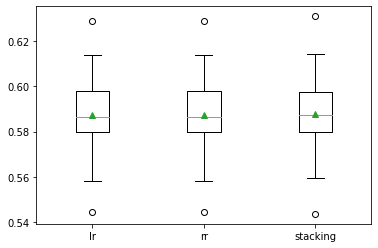

In [36]:
# compare ensemble to each standalone models for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
    X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1)
    return X, y
 
# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', LinearRegression()))
    level0.append(('rr', Ridge(alpha=0.2)))
    # define meta learner model
    level1 = LinearRegression()
    # define the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model
 
# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LinearRegression()
    models['rr'] = Ridge(alpha=0.2)
    models['stacking'] = get_stacking()
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 
# define dataset
X, y = X_train_second, y_train_second
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [37]:
level0 = list()
level0.append(('lr', LinearRegression()))
level0.append(('rr', Ridge(alpha=0.2)))

level1 = LinearRegression()

stacked_model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)

stacked_model.fit(scaled_mice_second_train_df.iloc[:,:-1], scaled_mice_second_train_df.iloc[:,-1]) # No splitting in this case

print("The score for the stacked model fitted to the second dataset is  : {}".format(roc_auc_score(y_test_second, stacked_model.predict(X_test_second))))

The score for the stacked model fitted to the second dataset is  : 0.5971369915600782


# Submitting

#### We'll go ahead with our submission with the model with the highest ROC AUC score.

In [38]:
res = stacked_model.predict(scaled_mice_second_test_df)
submission = pd.read_csv('../input/tabular-playground-series-aug-2022/sample_submission.csv')
submission['failure'] = res
submission.to_csv('submission.csv', index=False)

# Conclusion

#### Overall, I could have used more complex method for data imputation or considered keeping or removing some further features. 
#### However, I think the scores were not too bad considering the complexity of the models and in the future, I would want to further experiment on different data imputation methods.